# Github Repository Data Exploration  

## Setup 

Ensure you are in the `coding-smart-github` conda environment and have the following packages in your environment:
```bash

```

### Github Authentication 

Create a classic access token via [Github Authentication Settings](https://docs.github.com/en/authentication/keeping-your-account-and-data-secure/creating-a-personal-access-token#creating-a-personal-access-token-classic) and create a file called `config.cfg` with the following content: 
```bash
[ACCESS]
token = <your-access-token>
```
Ensure you've pasted in your token, but leave `[ACCESS]` and `token = `.

In [2]:
import pandas as pd
pd.set_option('max_colwidth', 1000)

import numpy as np

import os

import configparser

import requests

from github import Github

import datetime

from tqdm import tqdm

import matplotlib.pyplot as plt  

import json

In [3]:
# set up github access token with github package: 

config = configparser.ConfigParser()
config.read('../config.cfg')
config.sections()

access_token = config['ACCESS']['token']
g = Github(access_token, per_page=100)

In [4]:
# PARSE GITHUB REPO URL INTO USERNAME AND REPO NAME

 # via @karacolada 
def parse_github_repo_url(url):  
    """ Take github URL and split into username or organisation ('username') and repo name ('repo_name'). 
    Return username and repo name. 
    URL must start with 'https://' to split correctly.
    
    Examples: 
    >>> parse_github_repo_url("https://github.com/riboviz/riboviz")
    ('riboviz', 'riboviz')

    >>> parse_github_repo_url("https://github.com/FlicAnderson/20230215-JournalClub-BestPractices")
    ('FlicAnderson', '20230215-JournalClub-BestPractices')
    """
    assert isinstance(url, str), 'Ensure input url is a string' 
    
    try:
        _,_,_,username,repo_name = url.split('/')
    except ValueError:
        print(f"Could not unpack URL {url} into 5 segments. Confirm input is correct (and starts 'https://github.com/') or refactor function parse_github_repo_url.")
    
    return username, repo_name

In [5]:
parse_github_repo_url("https://github.com/riboviz/riboviz")
#parse_github_repo_url("https://github.com/FlicAnderson/20230215-JournalClub-BestPractices")  # extra example
#parse_github_repo_url(123)  # this correctly triggers assertion error.

('riboviz', 'riboviz')

In [6]:
# GET REPO JSON DATA 

def get_repo_json(username, repo_name):
    
    """ Gets json data for a github repository when given a valid username and repository name. 
    Returns 'json_repo_content', a dict. 
        
    Examples: 
    
    >>> get_repo_json('FlicAnderson', '20230215-JournalClub-BestPractices')
    {'id': 595202904,
     'node_id': 'R_kgDOI3oTWA',
     'name': '20230215-JournalClub-BestPractices',
     'full_name': 'FlicAnderson/20230215-JournalClub-BestPractices',
     'private': False,
     'owner': {'login 
     ... lots more content...
    
    # To list all fields load 'json' module and use keys(), e.g. 
    >>> content = get_repo_json('riboviz', 'riboviz')
    >>> content.keys()
    >>> ... list of fields returned for the dict. 
    
    # To access the value for a given key, save output to a variable and index the key name: 
    >>> content = get_repo_json('FlicAnderson', '20230215-JournalClub-BestPractices')
    >>> content['has_issues'] 
    True
    """
    assert isinstance(username, str), 'Ensure input username is a string' 
    assert isinstance(repo_name, str), 'Ensure input repo_name is a string' 
        
    json_repo_content = requests.get(f'https://api.github.com/repos/{username}/{repo_name}').json() 
                
    return json_repo_content

In [7]:
get_repo_json('riboviz', 'riboviz')

{'id': 184749972,
 'node_id': 'MDEwOlJlcG9zaXRvcnkxODQ3NDk5NzI=',
 'name': 'riboviz',
 'full_name': 'riboviz/riboviz',
 'private': False,
 'owner': {'login': 'riboviz',
  'id': 50236323,
  'node_id': 'MDEyOk9yZ2FuaXphdGlvbjUwMjM2MzIz',
  'avatar_url': 'https://avatars.githubusercontent.com/u/50236323?v=4',
  'gravatar_id': '',
  'url': 'https://api.github.com/users/riboviz',
  'html_url': 'https://github.com/riboviz',
  'followers_url': 'https://api.github.com/users/riboviz/followers',
  'following_url': 'https://api.github.com/users/riboviz/following{/other_user}',
  'gists_url': 'https://api.github.com/users/riboviz/gists{/gist_id}',
  'starred_url': 'https://api.github.com/users/riboviz/starred{/owner}{/repo}',
  'subscriptions_url': 'https://api.github.com/users/riboviz/subscriptions',
  'organizations_url': 'https://api.github.com/users/riboviz/orgs',
  'repos_url': 'https://api.github.com/users/riboviz/repos',
  'events_url': 'https://api.github.com/users/riboviz/events{/privacy}

In [8]:
content = get_repo_json('riboviz', 'riboviz')
#content['open_issues'] # check how many open issues  

In [9]:
# REPO CONNECTION FUNCTION 
# set up access token separately (see above!)

def get_repo_connection(username, repo_name): 
     """Create connection to github repository and get details 
     when given 'username' and 'repo_name' repository name. 
     repo_connection is type: github.Repository.Repository.  
     
     NOTE: Requires access_token setup with Github package. 
     
     Examples: 
     >>> get_repo_connection('riboviz', 'riboviz')
     Repository(full_name="riboviz/riboviz")
     
     """
     #g = Github(access_token)  # this access token setup line is required, plus extra setup code elsewhere above. 

     assert isinstance(username, str), 'Ensure input username is a string'  
     assert isinstance(repo_name, str), 'Ensure input repo_name is a string'  
    
     repo_connection = g.get_repo(f'{username}/{repo_name}')
    
     return repo_connection

In [10]:
get_repo_connection('riboviz', 'riboviz')

Repository(full_name="riboviz/riboviz")

In [11]:
repo_con = get_repo_connection('riboviz', 'riboviz')
type(repo_con)

github.Repository.Repository

In [12]:
iss = repo_con.get_issues() 
iss[0]

Issue(title="Updated riboviz documentation", number=481)

In [13]:
iss = repo_con.get_issues() 
iss[0].raw_data  # get the json content

{'url': 'https://api.github.com/repos/riboviz/riboviz/issues/481',
 'repository_url': 'https://api.github.com/repos/riboviz/riboviz',
 'labels_url': 'https://api.github.com/repos/riboviz/riboviz/issues/481/labels{/name}',
 'comments_url': 'https://api.github.com/repos/riboviz/riboviz/issues/481/comments',
 'events_url': 'https://api.github.com/repos/riboviz/riboviz/issues/481/events',
 'html_url': 'https://github.com/riboviz/riboviz/pull/481',
 'id': 1649028927,
 'node_id': 'PR_kwDOCwMPlM5NVbwM',
 'number': 481,
 'title': 'Updated riboviz documentation',
 'user': {'login': 'HannahMaroof',
  'id': 123739479,
  'node_id': 'U_kgDOB2AdVw',
  'avatar_url': 'https://avatars.githubusercontent.com/u/123739479?v=4',
  'gravatar_id': '',
  'url': 'https://api.github.com/users/HannahMaroof',
  'html_url': 'https://github.com/HannahMaroof',
  'followers_url': 'https://api.github.com/users/HannahMaroof/followers',
  'following_url': 'https://api.github.com/users/HannahMaroof/following{/other_user}'

In [14]:
iss = repo_con.get_issues() 
iss[0]._rawData # gives the json issue content 


{'url': 'https://api.github.com/repos/riboviz/riboviz/issues/481',
 'repository_url': 'https://api.github.com/repos/riboviz/riboviz',
 'labels_url': 'https://api.github.com/repos/riboviz/riboviz/issues/481/labels{/name}',
 'comments_url': 'https://api.github.com/repos/riboviz/riboviz/issues/481/comments',
 'events_url': 'https://api.github.com/repos/riboviz/riboviz/issues/481/events',
 'html_url': 'https://github.com/riboviz/riboviz/pull/481',
 'id': 1649028927,
 'node_id': 'PR_kwDOCwMPlM5NVbwM',
 'number': 481,
 'title': 'Updated riboviz documentation',
 'user': {'login': 'HannahMaroof',
  'id': 123739479,
  'node_id': 'U_kgDOB2AdVw',
  'avatar_url': 'https://avatars.githubusercontent.com/u/123739479?v=4',
  'gravatar_id': '',
  'url': 'https://api.github.com/users/HannahMaroof',
  'html_url': 'https://github.com/HannahMaroof',
  'followers_url': 'https://api.github.com/users/HannahMaroof/followers',
  'following_url': 'https://api.github.com/users/HannahMaroof/following{/other_user}'

In [15]:
# GET  REPO ISSUES DATA 

def get_json_repo_issues(username, repo_name):
    
    """ Gets LIST of json format issues data for a github repository when given a valid username and repository name. 
    Returns 'issues_content', a list of json elements. 
    Number of elements in list will be limited by the github per_page limit (30 by default). 

    TODO: write alternative function taking repo url input. 

    Examples: 
    get_json_repo_issues('riboviz', 'riboviz')
    TODO 
    """
    
    assert isinstance(username, str), 'Ensure input username is a string' 
    assert isinstance(repo_name, str), 'Ensure input repo_name is a string'
    
    issues_content = requests.get(f'https://api.github.com/repos/{username}/{repo_name}/issues').json()          
    return issues_content
    
    #repo_info = g.get_repo(f'{username}/{repo_name}')

In [19]:
issues_content = get_json_repo_issues('riboviz', 'riboviz')
# per_page
  
type(issues_content) # it's a LIST of json bits. 

list

In [20]:
type(issues_content[0]) # get type of 1 item in issues_content - it's a dict (json-y)

dict

In [21]:
df = pd.DataFrame(issues_content)
df.head() # will display first 5 rows  
df.keys() # will give column names  

Index(['url', 'repository_url', 'labels_url', 'comments_url', 'events_url',
       'html_url', 'id', 'node_id', 'number', 'title', 'user', 'labels',
       'state', 'locked', 'assignee', 'assignees', 'milestone', 'comments',
       'created_at', 'updated_at', 'closed_at', 'author_association',
       'active_lock_reason', 'draft', 'pull_request', 'body', 'reactions',
       'timeline_url', 'performed_via_github_app', 'state_reason'],
      dtype='object')

In [22]:
df[['title', 'number', 'state', 'created_at', 'closed_at']].head()  # need to pass a LIST of column names to use them for indexing multiple columns 

,title,number,state,created_at,closed_at
0,Updated riboviz documentation,481,open,2023-03-31T09:32:56Z,None
1,Display figshare doi,478,open,2023-01-10T11:47:25Z,None
2,Generic column name into CollateTpms,476,open,2022-10-07T05:47:03Z,None
3,Make collateTPMS code flexible to collate other variables,475,open,2022-10-07T05:35:27Z,None
4,Hisat2 and Bowtie installation issue. Nextflow example issue.,474,open,2022-08-30T06:17:41Z,None


In [23]:
#df.count() # shows we've got a per_page limit of 30 records... 
len(df)

30

In [24]:
repo_con = get_repo_connection('riboviz', 'riboviz')

all_issues = repo_con.get_issues(state='all') 

print(all_issues[0])

Issue(title="Updated riboviz documentation", number=481)


In [25]:
print(all_issues.totalCount) # don't trust totalCount - it's definitely wrong. 

164


In [26]:
df = pd.DataFrame(all_issues)
len(df) # this gives 478 issues, which is more like it. 

478

In [27]:
count = 0

for issue in repo_con.get_issues(state='all'): 
    count += 1
    print(f"{issue.title} - {count}")
    # prints 478 issues, matches the dataframe equivalent. 

Updated riboviz documentation - 1
bam-to-h5-error-479 - 2
Fix errors in bam_to_h5.R - 3
Display figshare doi - 4
Issue with `rhdf5::h5writeAttribute.integer` in `bam_to_h5_functions.R` - 5
Generic column name into CollateTpms - 6
Make collateTPMS code flexible to collate other variables - 7
Hisat2 and Bowtie installation issue. Nextflow example issue. - 8
Problems with the Rlibrary in the Wallace group space - 9
generateStatsFigs on human ribose data is taking too long and then terminated with an error "Error in 2:end_reads_pos_subset : argument of length 0" - 10
Full file output 470 - 11
Edit the code in codon_feature_analysis.R to give the whole window size not only position 0 - 12
Ensure CDS features only are used in Codon (pair) counting - 13
Analysing Inhibitory Codon Pairs (ICP) for new species - 14
Upgrade Nextflow version to enable dsl1 flag - 15
Flag for nextflow dsl 1 - 16
Upgrade riboviz output files and figures documentation,2022 edition - 17
document num_processes better -

Fix `bam_to_h5.R` bug if `is_riboviz_gff` is `FALSE` - 201
Add total number of features & genes to check_fasta_gff? - 202
Add UMI example to documentation - 203
Creating riboviz-friendly fasta and gff files - 204
Error from generate_stats_figs during test run of Weinberg dataset  - 205
Plots to go in interactive visualization - 206
Create helper script to run visualization with parameters from riboviz run - 207
Add support for use of environment variable names in YAML configuration file paths - 208
Explain gff and fasta choices for users - 209
Fixing small documentation typo in read_count_functions.R - 210
Check whether riboviz can be set up with Ubuntu LTS 20.04 & update install documentation - 211
Merge gff-spec-74 - 212
Remove use of IRanges R package functions from R analysis code - 213
hisat2rRNA --no-unal, fixes #250 - 214
Make hisat2ORF options flexible for multi-mapping etc. - 215
3nt periodicity small orf issue 243 acope3 - 216
Validating issue with 3nt periodicity plot is han

Investigate fastp for adaptor trimming and UMI extraction - 401
Replace NULL with NA in bam_to_h5.R make_option calls - 402
Write prep_riboviz.py configuration for simulated fastq records - 403
Handle missing features file 66 - 404
Create examples repository - 405
Define gff3 specification - 406
cmd_file default to run_riboviz_vignette.sh - 407
Check for None values when constructing R command-line invocations - 408
Output bash 63 - 409
Prep riboviz log files 55 - 410
Check count matrix is an integer - 411
Implement ribogrid-style plot - 412
Migrate "calculate features" RMarkdown file into an R script - 413
generate_stats_fig.R doesn't handle missing yeast_features.tsv  - 414
Refactor prep riboviz 34 - 415
Refactor prep riboviz 34 - 416
Option to just output bash commands? - 417
Write R helper functions to validate output files - 418
Refactor bam_to_h5.R - 419
Explore running run RiboViz on Eleanor - 420
Explore running RiboViz on Eddie - 421
Extend RiboViz to use UMI-tools for dedupli

In [32]:
df = pd.DataFrame(repo_con.get_issues(state='all')) 
#len(df) # gives 478, nice. 
#len(df.columns) # gives 1. This is unexpected... Turns out it returns title and number for each issue as 1 item.

#df.head()

#0
#0	Issue(title="Updated riboviz documentation", number=481)
#1	Issue(title="bam-to-h5-error-479", number=480)
#2	Issue(title="Fix errors in bam_to_h5.R", number=479)
#3	Issue(title="Display figshare doi", number=478)
#4	Issue(title="Issue with `rhdf5::h5writeAttribute.integer` in `bam_to_h5_functions.R`", number=477)

,0
0,"Issue(title=""Updated riboviz documentation"", number=481)"
1,"Issue(title=""bam-to-h5-error-479"", number=480)"
2,"Issue(title=""Fix errors in bam_to_h5.R"", number=479)"
3,"Issue(title=""Display figshare doi"", number=478)"
4,"Issue(title=""Issue with `rhdf5::h5writeAttribute.integer` in `bam_to_h5_functions.R`"", number=477)"


In [64]:
df.axes

[RangeIndex(start=0, stop=478, step=1), RangeIndex(start=0, stop=1, step=1)]

In [61]:
df.columns

RangeIndex(start=0, stop=1, step=1)

In [62]:
df.index

RangeIndex(start=0, stop=478, step=1)

In [66]:
df.size

478

In [67]:
df.shape

(478, 1)

In [68]:
df.ndim

2

In [69]:
df.empty

False

In [71]:
df.transpose

<bound method DataFrame.transpose of                                                                                                              0
0                                                     Issue(title="Updated riboviz documentation", number=481)
1                                                               Issue(title="bam-to-h5-error-479", number=480)
2                                                         Issue(title="Fix errors in bam_to_h5.R", number=479)
3                                                              Issue(title="Display figshare doi", number=478)
4           Issue(title="Issue with `rhdf5::h5writeAttribute.integer` in `bam_to_h5_functions.R`", number=477)
..                                                                                                         ...
473                                                   Issue(title="Fix TypeError in prepRiboviz.py", number=5)
474                           Issue(title="Document how to deploy and run R

In [70]:
df.values

array([[Issue(title="Updated riboviz documentation", number=481)],
       [Issue(title="bam-to-h5-error-479", number=480)],
       [Issue(title="Fix errors in bam_to_h5.R", number=479)],
       [Issue(title="Display figshare doi", number=478)],
       [Issue(title="Issue with `rhdf5::h5writeAttribute.integer` in `bam_to_h5_functions.R`", number=477)],
       [Issue(title="Generic column name into CollateTpms", number=476)],
       [Issue(title="Make collateTPMS code flexible to collate other variables", number=475)],
       [Issue(title="Hisat2 and Bowtie installation issue. Nextflow example issue.", number=474)],
       [Issue(title="Problems with the Rlibrary in the Wallace group space", number=473)],
       [Issue(title="generateStatsFigs on human ribose data is taking too long and then terminated with an error "Error in 2:end_reads_pos_subset : argument of length 0"", number=472)],
       [Issue(title="Full file output 470", number=471)],
       [Issue(title="Edit the code in codon

In [33]:
# CALCULATE ISSUE CLOSURE TIME 

def calc_issue_closure_days(repo_connection, issue_number):
    
    """
    Calculates time in days for a github issue to be marked as closed for a given repository 
    when given a valid 'repo_connection' and issue number for that repo. 

    Returns 'time_diff.days'. 
    
    Examples: 
    calc_issue_closure_days(repo_con, 481) 
    # does nothing as issue still open 
    
    calc_issue_closure_days(repo_con, 100)
    1
    
    calc_issue_closure_days(repo_con, 477)
    131
    """
    
    assert isinstance(issue_number, int), 'Ensure input repo_name is an integer'
    
    if repo_connection.get_issue(number=issue_number).closed_at: # only calc time_diff if issue's definitely closed.
               
        # get & print the difference between open and closure of issue.  
        time_diff = repo_connection.get_issue(number=issue_number).closed_at - repo_connection.get_issue(number=issue_number).created_at  
        return time_diff.days 
    
    else: 
        
        return None
        #pass # do nothing if it's still open. 
        #print(f"ERROR: This issue (#{issue_number}) is NOT closed, so cannot calculate time to closure.")

In [34]:
calc_issue_closure_days(repo_con, 481)

In [35]:
calc_issue_closure_days(repo_con, 100)

1

In [36]:
calc_issue_closure_days(repo_con, 477) 

131

In [37]:
type(repo_con)

github.Repository.Repository

In [40]:
calc_issue_closure_days(repo_con, 480)

20

In [41]:
calc_issue_closure_days(repo_con, 470)

1

In [42]:
calc_issue_closure_days(repo_con, 42) # returns nothing, as this is still open. 

In [72]:
# GET FIRST 100 CLOSED ISSUE NUMBERS 

closed_issue_nums = []

for issue in repo_con.get_issues(state='closed')[:100]: 
    closed_issue_nums.append(issue.number)
    
len(closed_issue_nums) # 100 
print(closed_issue_nums)

[480, 479, 477, 471, 470, 462, 461, 454, 453, 452, 450, 449, 447, 446, 445, 444, 443, 442, 440, 439, 438, 435, 434, 432, 430, 428, 426, 425, 424, 423, 422, 421, 419, 418, 417, 416, 411, 408, 407, 406, 405, 404, 401, 399, 395, 394, 392, 389, 387, 386, 384, 383, 382, 380, 379, 378, 376, 374, 373, 372, 371, 370, 369, 368, 367, 366, 365, 364, 363, 362, 361, 359, 358, 356, 355, 351, 349, 348, 347, 346, 345, 344, 343, 341, 338, 337, 336, 335, 334, 333, 332, 331, 330, 329, 328, 327, 326, 324, 323, 321]


In [73]:
# CALC FIRST 100 CLOSED ISSUE TIMES IN DAYS

closed_issue_closetimes = []

for issue in repo_con.get_issues(state='closed')[:100]: 
    closed_issue_closetimes.append( calc_issue_closure_days(repo_con, issue_number = issue.number ))
    
len(closed_issue_closetimes) # 100
print(closed_issue_closetimes)

[20, 27, 131, 0, 1, 0, 0, 0, 8, 0, 0, 34, 7, 55, 201, 201, 63, 12, 28, 0, 0, 91, 0, 7, 97, 6, 6, 7, 7, 53, 12, 98, 16, 30, 27, 20, 27, 129, 29, 15, 0, 76, 2, 5, 27, 21, 20, 151, 14, 65, 0, 26, 0, 48, 0, 5, 79, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 14, 0, 72, 86, 0, 0, 42, 7, 12, 0, 6, 1, 56, 197, 48, 6, 7, 4, 7, 7, 7, 8, 63, 7, 0, 8, 1, 20, 20, 209, 210, 97]


In [74]:
# GET FIRST 100 CLOSED ISSUE CREATION DATES


closed_issue_created_at = []

for issue in repo_con.get_issues(state='closed')[:100]: 
    closed_issue_created_at.append( issue.created_at )
    
#len(closed_issue_created_at) # 100 
print(closed_issue_created_at)

[datetime.datetime(2023, 2, 17, 12, 34, 39), datetime.datetime(2023, 2, 15, 17, 57, 52), datetime.datetime(2022, 11, 3, 19, 21, 52), datetime.datetime(2022, 7, 5, 15, 19, 40), datetime.datetime(2022, 7, 5, 8, 39, 11), datetime.datetime(2022, 5, 10, 14, 25, 3), datetime.datetime(2022, 5, 10, 14, 18), datetime.datetime(2022, 2, 1, 13, 24, 22), datetime.datetime(2022, 1, 10, 17, 4, 25), datetime.datetime(2021, 12, 17, 12, 36, 28), datetime.datetime(2021, 11, 11, 14, 56, 2), datetime.datetime(2021, 11, 11, 14, 51, 12), datetime.datetime(2021, 11, 3, 16, 37, 46), datetime.datetime(2021, 10, 21, 15, 58, 29), datetime.datetime(2021, 10, 20, 17, 52), datetime.datetime(2021, 10, 20, 14, 36, 53), datetime.datetime(2021, 10, 14, 15, 6, 16), datetime.datetime(2021, 10, 8, 15, 10, 6), datetime.datetime(2021, 9, 22, 14, 17, 53), datetime.datetime(2021, 9, 22, 10, 6, 6), datetime.datetime(2021, 9, 22, 10, 6, 4), datetime.datetime(2021, 9, 15, 16, 7, 5), datetime.datetime(2021, 9, 15, 15, 37, 35), dat

In [75]:
# GET FIRST 100 CLOSED ISSUE CLOSURE DATES


closed_issue_closed_at = []

for issue in repo_con.get_issues(state='closed')[:100]: 
    closed_issue_closed_at.append( issue.closed_at )
    
#len(closed_issue_closed_at) # 100 
print(closed_issue_closed_at)

[datetime.datetime(2023, 3, 9, 14, 39, 45), datetime.datetime(2023, 3, 15, 17, 34, 5), datetime.datetime(2023, 3, 15, 17, 36, 14), datetime.datetime(2022, 7, 6, 14, 21, 9), datetime.datetime(2022, 7, 6, 14, 36, 59), datetime.datetime(2022, 5, 10, 14, 25, 17), datetime.datetime(2022, 5, 10, 14, 23, 38), datetime.datetime(2022, 2, 1, 14, 47, 5), datetime.datetime(2022, 1, 19, 15, 41, 16), datetime.datetime(2021, 12, 17, 12, 36, 35), datetime.datetime(2021, 11, 11, 17, 23, 38), datetime.datetime(2021, 12, 15, 16, 33, 3), datetime.datetime(2021, 11, 11, 16, 29, 47), datetime.datetime(2021, 12, 16, 15, 13, 27), datetime.datetime(2022, 5, 9, 21, 38, 36), datetime.datetime(2022, 5, 9, 22, 6, 23), datetime.datetime(2021, 12, 16, 17, 6, 14), datetime.datetime(2021, 10, 21, 10, 42, 48), datetime.datetime(2021, 10, 20, 15, 34, 3), datetime.datetime(2021, 9, 22, 15, 39, 48), datetime.datetime(2021, 9, 22, 15, 40, 29), datetime.datetime(2021, 12, 16, 15, 13, 58), datetime.datetime(2021, 9, 15, 15, 

In [89]:
closed_issue_cols = {'issue_number': closed_issue_nums, 'creation_date' : closed_issue_created_at, 'closure_date' : closed_issue_closed_at}

closed_issue_df = pd.DataFrame(closed_issue_cols)

closed_issue_df


,issue_number,creation_date,closure_date
0,480,2023-02-17 12:34:39,2023-03-09 14:39:45
1,479,2023-02-15 17:57:52,2023-03-15 17:34:05
2,477,2022-11-03 19:21:52,2023-03-15 17:36:14
3,471,2022-07-05 15:19:40,2022-07-06 14:21:09
4,470,2022-07-05 08:39:11,2022-07-06 14:36:59
...,...,...,...
95,327,2021-05-24 16:05:55,2021-06-14 14:11:17
96,326,2021-05-24 16:04:09,2021-06-14 14:11:14
97,324,2021-05-20 09:19:46,2021-12-15 16:25:09
98,323,2021-05-19 21:45:04,2021-12-16 13:52:23


In [90]:
# calculate close time from DF rather than in loop. 
# This function needs more detail and probably isn't very robust just now. 

def time_diff (closed_at, created_at):
    time_diff = closed_at - created_at
    return time_diff.days

In [91]:
time_diff(closed_issue_df.closure_date[0], closed_issue_df.creation_date[0])  # test simple time_diff function

20

In [92]:
# calculate close time from DF rather than in loop. 
 # lambda function equivalent to anonymous function in R I think. 

closed_issue_df['close_time'] = closed_issue_df.apply(lambda x: time_diff(x.closure_date, x.creation_date), axis=1)

closed_issue_df

,issue_number,creation_date,closure_date,close_time
0,480,2023-02-17 12:34:39,2023-03-09 14:39:45,20
1,479,2023-02-15 17:57:52,2023-03-15 17:34:05,27
2,477,2022-11-03 19:21:52,2023-03-15 17:36:14,131
3,471,2022-07-05 15:19:40,2022-07-06 14:21:09,0
4,470,2022-07-05 08:39:11,2022-07-06 14:36:59,1
...,...,...,...,...
95,327,2021-05-24 16:05:55,2021-06-14 14:11:17,20
96,326,2021-05-24 16:04:09,2021-06-14 14:11:14,20
97,324,2021-05-20 09:19:46,2021-12-15 16:25:09,209
98,323,2021-05-19 21:45:04,2021-12-16 13:52:23,210


In [93]:
# Get average close time in DF of repo issues.

closed_issue_df['close_time'].mean()
# 32.28 days to close on average of first 100 issue tickets. 

32.28

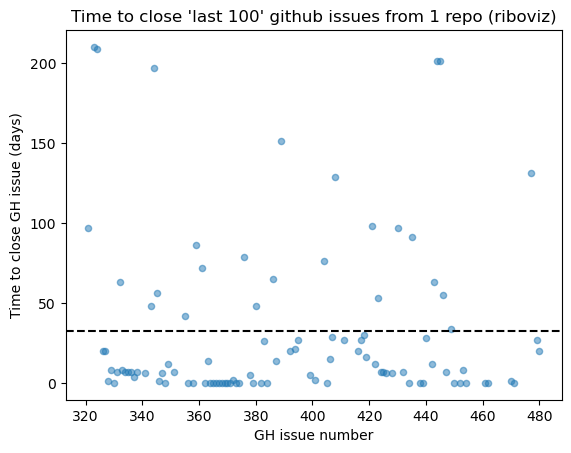

In [116]:
# plot  

closed_issue_df.plot.scatter(x='issue_number', y='close_time', alpha=0.5)
plt.xlabel("GH issue number")
plt.ylabel("Time to close GH issue (days)")
plt.title("Time to close 'last 100' github issues from 1 repo (riboviz)")
plt.axhline(y=np.mean(closed_issue_df.close_time), linestyle='--', color='black')  # add mean line with average close time for this set of issues
plt.show()


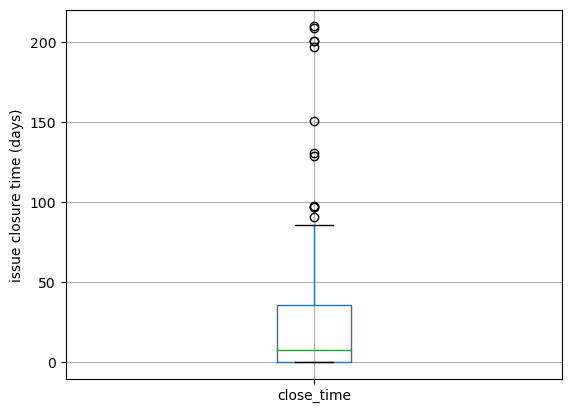

In [128]:
closed_issue_df.boxplot(column='close_time', grid=True) 
plt.ylabel("issue closure time (days)")# could use 'by=column' to groupby() eg. issue labels? 
plt.show()

ISSUE TICKETS TODO:   
 - PLOT times/dates of close time ALL issue tickets for this one repo.  
 - Plot issues with different colours per issue label types? (e.g. 'first issue' vs 'bug' vs other user defined labels?) 
 - Plot close times of assigned issues vs unassigned issues? 
 
 - adapt functions to take repo URL / LIST of repo URLS to be able to analyse more than one repo. 
 
 - create function which pulls data from github repo URL, calcs close times, plots repo issues (make optional) and returns dataframe for further analysis. 
  
 - write function which gets ALL issue ticket information from 1 repo into ONE df (e.g avoids PAGING issues from get_json_repo_issues(), pulls ALL creation/closure info etc, not just the title/ticket number as get_issues() does...)

 - address which issues are PRs (omit these from the issue tic calcs, they're generated separately)    
 - calc time to close PRs? Is this diff from issue timings?   
 
 - is it worth trying to sample amongst issue tickets to reduce run time? there's the DataFrame.sample() function that does this I think?  
 
 
 
 
DEFENSIVE PROGRAMMING TODO:    
 - all of it. :D  
  - Find whether a sample of ROpenSci R package repos on github use assertions?   
   - use of {testthat} package (but test for it as requirement, and then check if it's used and implemented AS INTENDED);   
   - avoidance of require() to import packages  
   - asserts present by some means    
   - message() / custom error messages used,   
   - stop(),   
   - tryCatch(),   
   - ... etc.   
 - Think about other parts of defensive programming I can look for - read more from below.    
 
 
 Reading:  
 [{testthat} R package info](https://testthat.r-lib.org/)
 [Hadley Wickham's Exceptions & Debugging advice from 'Advanced R'](http://adv-r.had.co.nz/Exceptions-Debugging.html)  
 [defensive programming in R](https://www.geeksforgeeks.org/defensive-programming-in-r/)
 [10 rules of defensive programming in R](https://www.r-bloggers.com/2018/07/the-ten-rules-of-defensive-programming-in-r/)